In [1]:
# Import the random module.
import random 
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit

In [2]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

18.7 µs ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
def latitudes(x):
    latitudes = []
    while x < 1501:
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with x = 1.
%timeit latitudes(1)

4.49 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [6]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2542cf2578abf24fac37456405279597


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2542cf2578abf24fac37456405279597&q=Boston


In [14]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [17]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":37,"pressure":1016,"humidity":69,"temp_min":30.99,"temp_max":44.01},"wind":{"speed":9.17,"deg":250},"clouds":{"all":49},"dt":1573438617,"sys":{"type":1,"id":4967,"country":"US","sunrise":1573385312,"sunset":1573421271},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [18]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 37,
  'pressure': 1016,
  'humidity': 69,
  'temp_min': 30.99,
  'temp_max': 44.01},
 'wind': {'speed': 9.17, 'deg': 250},
 'clouds': {'all': 49},
 'dt': 1573438617,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1573385312,
  'sunset': 1573421271},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [20]:
# Get the JSON data.
boston_data = city_weather.json()

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 44.01 69 49 9.17


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2019-11-11 02:16:57'

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [26]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | floresta
Processing Record 2 of Set 13 | new norfolk
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | alofi
Processing Record 5 of Set 13 | hobart
Processing Record 6 of Set 13 | georgetown
Processing Record 7 of Set 13 | busselton
Processing Record 8 of Set 13 | jabalpur
Processing Record 9 of Set 13 | castro
Processing Record 10 of Set 13 | rabo de peixe
Processing Record 11 of Set 13 | lubango
Processing Record 12 of Set 13 | nouakchott
Processing Record 13 of Set 13 | lolua
City not found. Skipping...
Processing Record 14 of Set 13 | butaritari
Processing Record 15 of Set 13 | tasiilaq
Processing Record 16 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 13 | sao filipe
Processing Record 18 of Set 13 | mar del plata
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | bukachacha
Processing Record 21 of Set 13 | carnarvon
Processing Record 22 of Set 13 | nizhneyansk
City not foun

Processing Record 35 of Set 16 | puerto ayora
Processing Record 36 of Set 16 | qaanaaq
Processing Record 37 of Set 16 | bongaree
Processing Record 38 of Set 16 | chickasha
Processing Record 39 of Set 16 | san joaquin
Processing Record 40 of Set 16 | imbituba
Processing Record 41 of Set 16 | baykit
Processing Record 42 of Set 16 | grindavik
Processing Record 43 of Set 16 | tual
Processing Record 44 of Set 16 | mwingi
Processing Record 45 of Set 16 | chum phae
Processing Record 46 of Set 16 | jalu
Processing Record 47 of Set 16 | bilibino
Processing Record 48 of Set 16 | fengzhen
Processing Record 49 of Set 16 | dwarka
Processing Record 50 of Set 16 | itoman
Processing Record 1 of Set 17 | bengkulu
City not found. Skipping...
Processing Record 2 of Set 17 | ahipara
Processing Record 3 of Set 17 | raub
Processing Record 4 of Set 17 | mutis
Processing Record 5 of Set 17 | saint george
Processing Record 6 of Set 17 | buriti bravo
Processing Record 7 of Set 17 | kargasok
Processing Record 8 

Processing Record 17 of Set 20 | ostrovnoy
Processing Record 18 of Set 20 | clarksdale
Processing Record 19 of Set 20 | ayr
Processing Record 20 of Set 20 | turukhansk
Processing Record 21 of Set 20 | ploemeur
Processing Record 22 of Set 20 | gobabis
Processing Record 23 of Set 20 | west bay
Processing Record 24 of Set 20 | broome
Processing Record 25 of Set 20 | vao
Processing Record 26 of Set 20 | hartselle
Processing Record 27 of Set 20 | huarmey
Processing Record 28 of Set 20 | cedar city
Processing Record 29 of Set 20 | salinas
Processing Record 30 of Set 20 | khandyga
Processing Record 31 of Set 20 | ipu
Processing Record 32 of Set 20 | uray
Processing Record 33 of Set 20 | kavieng
Processing Record 34 of Set 20 | pacific grove
Processing Record 35 of Set 20 | summerside
Processing Record 36 of Set 20 | villamontes
Processing Record 37 of Set 20 | bourges
Processing Record 38 of Set 20 | harindanga
Processing Record 39 of Set 20 | wanning
Processing Record 40 of Set 20 | los amat

Processing Record 4 of Set 24 | te anau
Processing Record 5 of Set 24 | maumere
Processing Record 6 of Set 24 | hue
Processing Record 7 of Set 24 | kiboga
Processing Record 8 of Set 24 | talaya
Processing Record 9 of Set 24 | samarai
Processing Record 10 of Set 24 | anchorage
Processing Record 11 of Set 24 | kurumkan
Processing Record 12 of Set 24 | xining
Processing Record 13 of Set 24 | cap-aux-meules
Processing Record 14 of Set 24 | paita
Processing Record 15 of Set 24 | nagothana
Processing Record 16 of Set 24 | manado
Processing Record 17 of Set 24 | acapulco
Processing Record 18 of Set 24 | vung tau
Processing Record 19 of Set 24 | carauari
Processing Record 20 of Set 24 | regina
Processing Record 21 of Set 24 | umm lajj
Processing Record 22 of Set 24 | baruun-urt
Processing Record 23 of Set 24 | arica
Processing Record 24 of Set 24 | pemberton
Processing Record 25 of Set 24 | scarborough
Processing Record 26 of Set 24 | sibu
Processing Record 27 of Set 24 | khash
Processing Reco

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Floresta,-8.60,-38.57,73.49,73,10,13.35,BR,2019-11-11 02:19:08
1,New Norfolk,-42.78,147.06,77.00,17,100,23.04,AU,2019-11-11 02:19:08
2,Ushuaia,-54.81,-68.31,53.60,54,20,11.41,AR,2019-11-11 02:19:09
3,Alofi,-19.06,-169.92,82.40,65,84,13.87,NU,2019-11-11 02:19:09
4,Hobart,-42.88,147.33,77.00,17,100,23.04,AU,2019-11-11 02:15:54
5,Georgetown,6.80,-58.16,80.60,94,20,4.70,GY,2019-11-11 02:16:33
6,Busselton,-33.64,115.35,71.01,32,0,11.12,AU,2019-11-11 02:16:19
7,Jabalpur,23.16,79.95,68.00,72,0,2.24,IN,2019-11-11 02:19:10
8,Castro,-42.48,-73.76,51.80,87,78,5.82,CL,2019-11-11 02:16:28
9,Rabo De Peixe,37.80,-25.58,61.00,82,20,8.05,PT,2019-11-11 02:19:10


In [28]:
New_Column_Order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[New_Column_Order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Floresta,BR,2019-11-11 02:19:08,-8.60,-38.57,73.49,73,10,13.35
1,New Norfolk,AU,2019-11-11 02:19:08,-42.78,147.06,77.00,17,100,23.04
2,Ushuaia,AR,2019-11-11 02:19:09,-54.81,-68.31,53.60,54,20,11.41
3,Alofi,NU,2019-11-11 02:19:09,-19.06,-169.92,82.40,65,84,13.87
4,Hobart,AU,2019-11-11 02:15:54,-42.88,147.33,77.00,17,100,23.04
5,Georgetown,GY,2019-11-11 02:16:33,6.80,-58.16,80.60,94,20,4.70
6,Busselton,AU,2019-11-11 02:16:19,-33.64,115.35,71.01,32,0,11.12
7,Jabalpur,IN,2019-11-11 02:19:10,23.16,79.95,68.00,72,0,2.24
8,Castro,CL,2019-11-11 02:16:28,-42.48,-73.76,51.80,87,78,5.82
9,Rabo De Peixe,PT,2019-11-11 02:19:10,37.80,-25.58,61.00,82,20,8.05


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1573438883.6421342

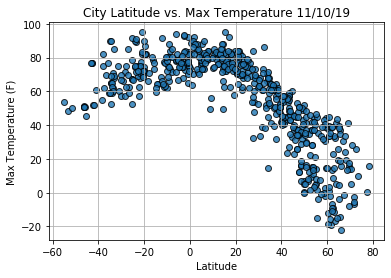

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

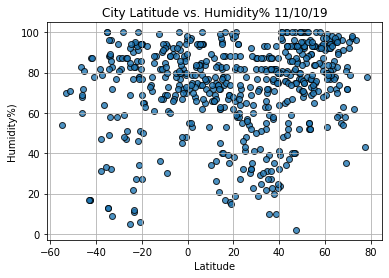

In [33]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity% "+ time.strftime("%x"))
plt.ylabel("Humidity%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

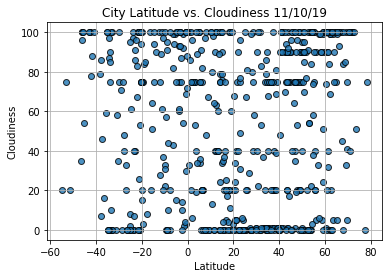

In [34]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

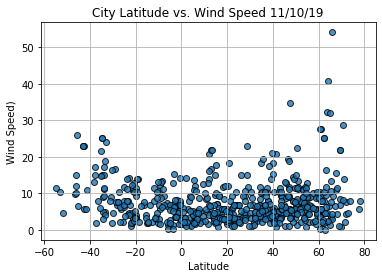

In [35]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [36]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [37]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [38]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is is: 0.011


In [39]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]
regress_values

[73.68973782871005,
 73.05563705897195,
 89.2704995994175,
 76.27143381978658,
 56.750188694278094,
 61.64182320368626,
 81.29894706556718,
 86.00940992647874,
 87.18702564170663,
 63.72529716139714]

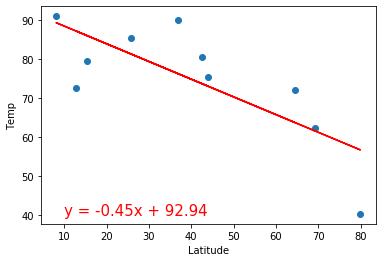

In [40]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Floresta,BR,2019-11-11 02:19:08,-8.60,-38.57,73.49,73,10,13.35
1,New Norfolk,AU,2019-11-11 02:19:08,-42.78,147.06,77.00,17,100,23.04
2,Ushuaia,AR,2019-11-11 02:19:09,-54.81,-68.31,53.60,54,20,11.41
3,Alofi,NU,2019-11-11 02:19:09,-19.06,-169.92,82.40,65,84,13.87
4,Hobart,AU,2019-11-11 02:15:54,-42.88,147.33,77.00,17,100,23.04


In [43]:
index13 =city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2019-11-11 02:17:00
Lat                         65.61
Lng                        -37.64
Max Temp                     37.4
Humidity                       90
Cloudiness                    100
Wind Speed                  54.13
Name: 13, dtype: object

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

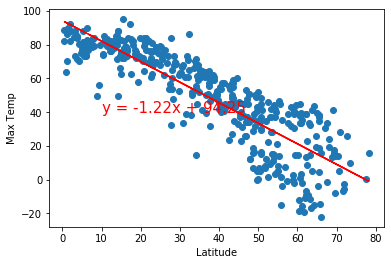

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [46]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(xs_values, ys_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(xs_values, ys_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = xs_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(xs_values,ys_values)
    plt.plot(xs_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(           line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

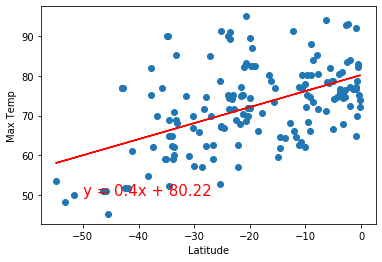

In [47]:
# Linear regression on the Southen Hemisphere
xs_values = southern_hemi_df["Lat"]
ys_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(xs_values, ys_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,50))

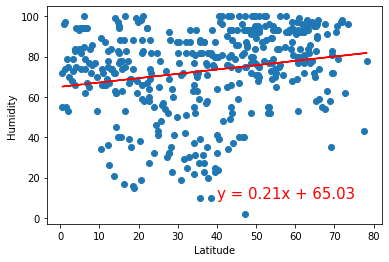

In [48]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Humidity', 'Humidity',(40,10))

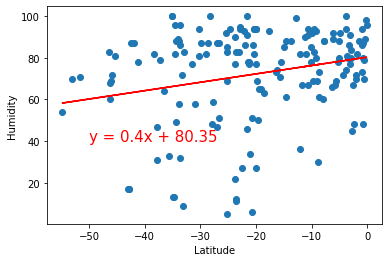

In [49]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Humidity', 'Humidity',(-50,40))

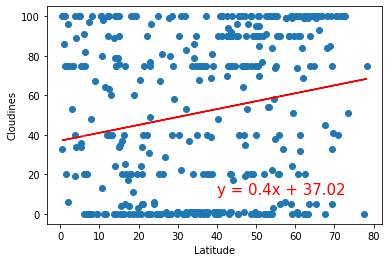

In [50]:
# Linear regression on the Northern Hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudines', 'Cloudines',(40,10))

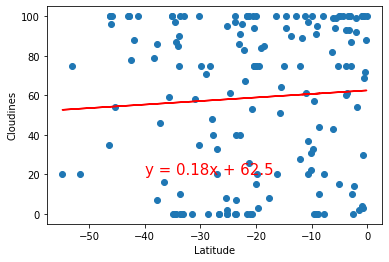

In [51]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudines', 'Cloudines',(-40,20))

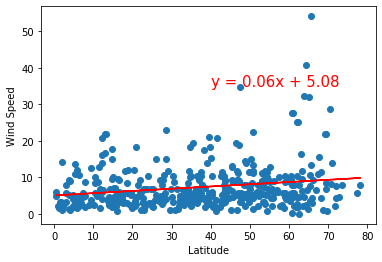

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

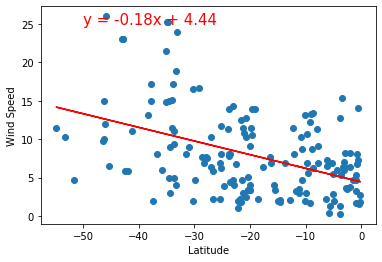

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))

In [54]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
import gmaps.datasets
# Import the API key.
from config import g_key

In [55]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Floresta,BR,2019-11-11 02:19:08,-8.60,-38.57,73.49,73,10,13.35
1,1,New Norfolk,AU,2019-11-11 02:19:08,-42.78,147.06,77.00,17,100,23.04
2,2,Ushuaia,AR,2019-11-11 02:19:09,-54.81,-68.31,53.60,54,20,11.41
3,3,Alofi,NU,2019-11-11 02:19:09,-19.06,-169.92,82.40,65,84,13.87
4,4,Hobart,AU,2019-11-11 02:15:54,-42.88,147.33,77.00,17,100,23.04


In [56]:
# Get the data types.
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [57]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [58]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [124]:
# Heatmap of temperature
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]
# 2. Assign the weights variable to some values.
max_temp = city_data_df["Max Temp"]
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp],dissipating=False, max_intensity=300, point_radius=4) #[max(0,temp) for temp in max_temp])

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)
# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [125]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [129]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
cloudiness = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=cloudiness, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [138]:
# Heatmap of percent windspeed
locations = city_data_df[["Lat", "Lng"]]
cloudiness = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=cloudiness, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [120]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 32
What is the maximum temperature you would like for your trip? 75


In [121]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Tuatapere,NZ,2019-11-11 02:20:50,-46.13,167.69,51.01,69,96,11.99
1,1,Bredasdorp,ZA,2019-11-11 02:19:29,-34.53,20.04,64.99,82,97,14.99
3,3,Albany,US,2019-11-11 02:19:15,42.65,-73.75,44.60,65,90,3.44
5,5,Xining,CN,2019-11-11 02:21:07,36.62,101.77,39.72,27,0,2.86
6,6,Vostok,RU,2019-11-11 02:19:38,46.45,135.83,37.81,96,100,5.17
7,7,Ushuaia,AR,2019-11-11 02:19:09,-54.81,-68.31,53.60,54,20,11.41
8,8,Lompoc,US,2019-11-11 02:19:18,34.64,-120.46,59.00,93,90,10.25
10,10,Quelimane,MZ,2019-11-11 02:26:00,-17.88,36.89,73.40,94,20,4.29
13,13,Busselton,AU,2019-11-11 02:16:19,-33.64,115.35,71.01,32,0,11.12
14,14,Tasiilaq,GL,2019-11-11 02:17:00,65.61,-37.64,37.40,90,100,54.13


In [122]:
preferred_cities_df.count()

City_ID       319
City          319
Country       316
Date          319
Lat           319
Lng           319
Max Temp      319
Humidity      319
Cloudiness    319
Wind Speed    319
dtype: int64

In [140]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Tuatapere,NZ,51.01,-46.13,167.69,
1,Bredasdorp,ZA,64.99,-34.53,20.04,
3,Albany,US,44.60,42.65,-73.75,
5,Xining,CN,39.72,36.62,101.77,
6,Vostok,RU,37.81,46.45,135.83,
...,...,...,...,...,...,...
533,Barcelona,ES,50.00,41.38,2.18,
534,New Kensington,US,50.00,40.57,-79.76,
535,Mbuji-Mayi,CD,69.42,-6.13,23.60,
536,Luoyang,CN,64.42,34.66,112.42,


In [141]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import g_key# Set parameters to search for a hotel.

params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [142]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

In [143]:
hotels

{'html_attributions': [],
 'next_page_token': 'CqQCHgEAAL3QCdaN9LWXn0xQZ1eeXeW3onLJJ3NObzvGOYuhJhH2Nz2yeGaksmmZSKhozT7qpwGVvH-TaPi4i1rqbRReHL7CRE2ZpRpd5CHllVcyrgSOXt1kD_epFnce9pb1I-KKi4tTQtnJLrzmglvGi03NZQvOcclike7odkIJp4bbzRvUYmnEN0aryRhvFvmb4M7VFp-g0-sua_27KTWm5WApK5168h3pcMP_LFzVnnv8Mb1CfnGMAtWwcXA-X8wMUAmg0I0I6AHumHcymBVUh3rn2N-i6z2Yd8sY9BYDLYTh2AbnclefibOUMv4gAZp2c_BDvXz4Rfq1RcOzxXd1xEa69cmLBeZW-5wQrariEbTaOJ1RTwT4BvJk07N2hV8cOOjr0xIQiBFBL061VDP76x0JocpxfxoU2QmiNDGk_BYsIdny5oFN6boewjY',
 'results': [{'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594402302915,
      'lng': 2.354348530291502},
     'southwest': {'lat': 48.8567422697085, 'lng': 2.351650569708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/lodging-71.png',
   'id': '7fa47cb61d7345cecc3b802d0e04fcff2b3d5ecb',
   'name': 'Hôtel Duo',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 3840,
     'html_attributions': ['<a href=

In [149]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to the params dictionary as values to the location key.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
  # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not foun

In [151]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [153]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [154]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [155]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))